In [2]:
import pandas as pd

# Load the dataset again to ensure we're starting fresh
dataset_path = 'predictive-maintenance-dataset.csv'
df = pd.read_csv(dataset_path, sep=';')  # Using the semicolon as the separator this time

# Convert the columns to the appropriate data types
df['ball-bearing'] = pd.to_numeric(df['ball-bearing'], errors='coerce')
df['humidity'] = pd.to_numeric(df['humidity'], errors='coerce')
df['vibration'] = pd.to_numeric(df['vibration'], errors='coerce')

# Drop rows with any NaN values that resulted from conversion errors
df = df.dropna()

# Confirm the DataFrame structure and show the first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 106238 entries, 0 to 112000
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ball-bearing  106238 non-null  float64
 1   humidity      106238 non-null  float64
 2   vibration     106238 non-null  float64
dtypes: float64(3)
memory usage: 3.2 MB


,ball-bearing,humidity,vibration
0,93.744,73.999,18.000
1,93.740,73.999,18.001
2,93.736,73.998,18.002
3,93.732,73.998,18.003
4,93.729,73.998,18.004


In [3]:
# Load the original dataset without any cleaning to compare the number of rows
df_original = pd.read_csv(dataset_path, sep=';')

# Count the number of rows in the original dataset
original_row_count = df_original.shape[0]

# Count the number of rows after cleaning (which we have from the previous step)
cleaned_row_count = df.shape[0]

# Calculate the number of rows removed
rows_removed = original_row_count - cleaned_row_count

original_row_count, cleaned_row_count, rows_removed


(112001, 106238, 5763)

In [4]:
# Generate descriptive statistics for the dataset
descriptive_stats = df.describe()

descriptive_stats


,ball-bearing,humidity,vibration
count,106238.000000,106238.000000,106238.000000
mean,46.340458,74.218396,28.244226
std,19.102286,0.689153,24.176367
min,16.933000,72.399000,2.000000
25%,29.554500,73.908000,8.000000
50%,43.397000,74.209000,21.273000
75%,64.000000,74.722000,39.093000
max,93.744000,75.400000,99.995000


c:\Users\izzud\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\izzud\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\izzud\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\izzud\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

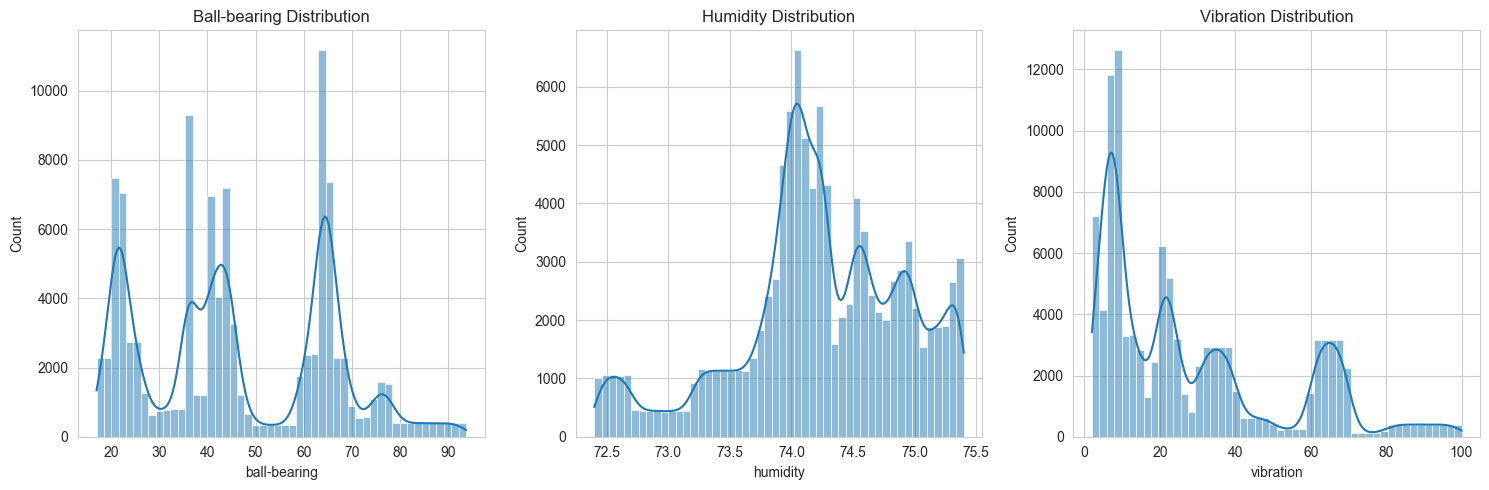

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot histograms for each feature in the dataset
plt.figure(figsize=(15, 5))

# Histogram for 'ball-bearing'
plt.subplot(1, 3, 1)
sns.histplot(df['ball-bearing'], kde=True, bins=50)
plt.title('Ball-bearing Distribution')

# Histogram for 'humidity'
plt.subplot(1, 3, 2)
sns.histplot(df['humidity'], kde=True, bins=50)
plt.title('Humidity Distribution')

# Histogram for 'vibration'
plt.subplot(1, 3, 3)
sns.histplot(df['vibration'], kde=True, bins=50)
plt.title('Vibration Distribution')

# Show the histograms
plt.tight_layout()
plt.show()


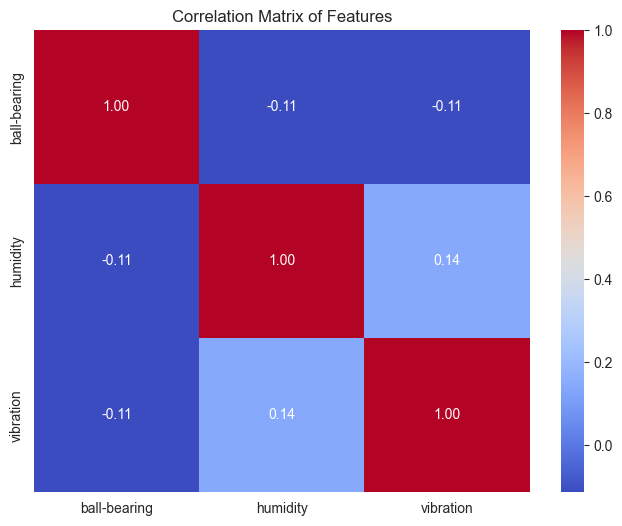

In [6]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the standard scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df_scaled = scaler.fit_transform(df)

# Convert the scaled array back to a DataFrame for readability
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Show the first few rows of the scaled dataset
df_scaled.head()


,ball-bearing,humidity,vibration
0,2.481576,-0.318357,-0.423731
1,2.481366,-0.318357,-0.423690
2,2.481157,-0.319808,-0.423648
3,2.480947,-0.319808,-0.423607
4,2.480790,-0.319808,-0.423565


In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# We'll use 80% of the data for training and 20% for testing
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

# Show the number of samples in each set
num_samples_train = X_train.shape[0]
num_samples_test = X_test.shape[0]

num_samples_train, num_samples_test


(84990, 21248)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Separate the features and target variable for training
# Assuming the 'vibration' column is the target variable and the rest are features
X_train_features = X_train.drop('vibration', axis=1)
X_test_features = X_test.drop('vibration', axis=1)
y_train_target = X_train['vibration']
y_test_target = X_test['vibration']

# Train the Linear Regression model
linear_model.fit(X_train_features, y_train_target)
# Train the Decision Tree model
decision_tree_model.fit(X_train_features, y_train_target)
# Train the Random Forest model
random_forest_model.fit(X_train_features, y_train_target)

# Make predictions with all models on the testing set
linear_predictions = linear_model.predict(X_test_features)
decision_tree_predictions = decision_tree_model.predict(X_test_features)
random_forest_predictions = random_forest_model.predict(X_test_features)

# Calculate the Mean Squared Error (MSE) for each model
linear_mse = mean_squared_error(y_test_target, linear_predictions)
decision_tree_mse = mean_squared_error(y_test_target, decision_tree_predictions)
random_forest_mse = mean_squared_error(y_test_target, random_forest_predictions)

(linear_mse, decision_tree_mse, random_forest_mse)


(0.9663104370423296, 1.205681660595156, 0.913133720319921)

Mean Absolute Error (Random Forest): 0.550352475389042
R-squared (Random Forest): 0.08276662415313851


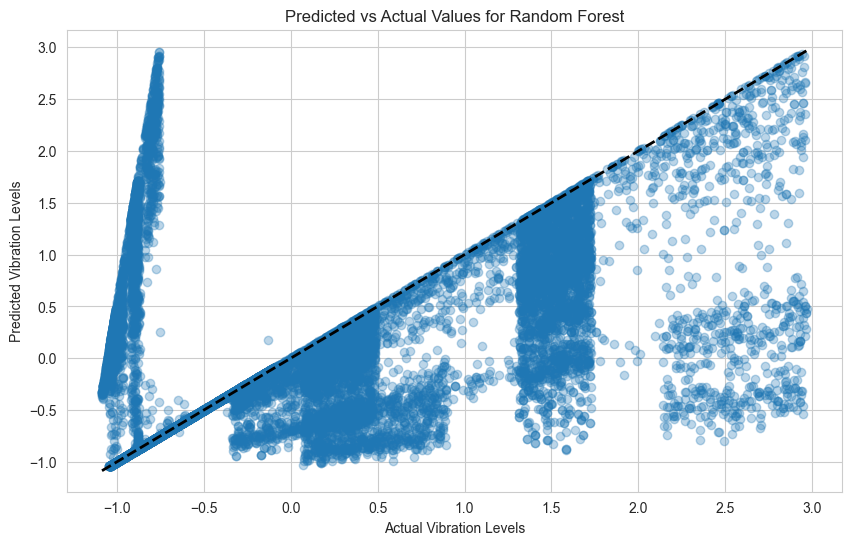

c:\Users\izzud\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\izzud\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


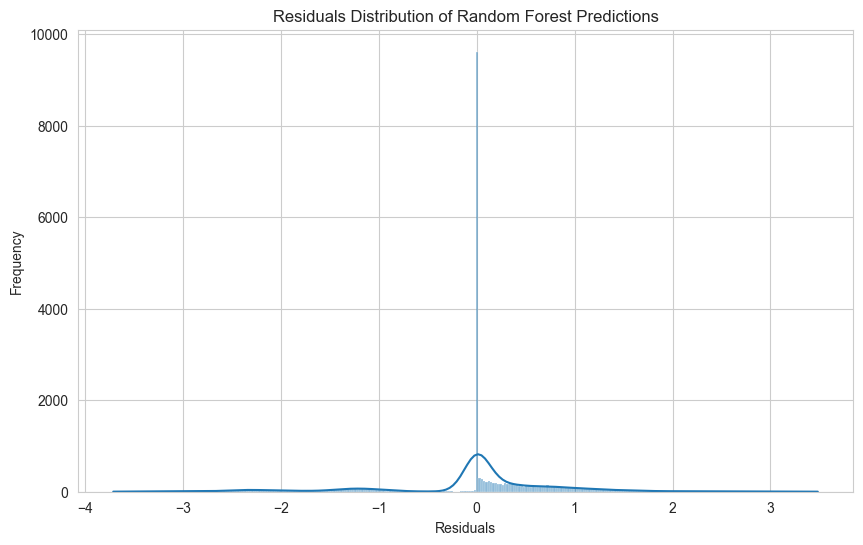

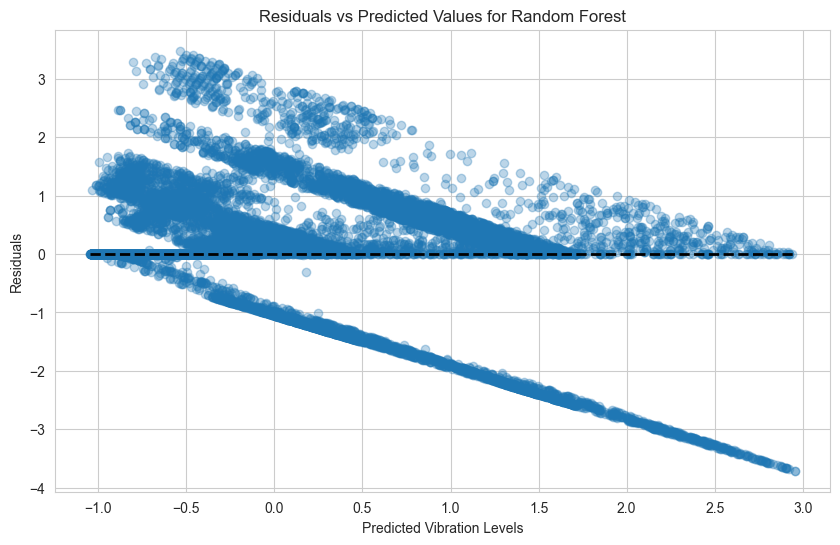

In [10]:
# Import necessary libraries for metrics and plotting
from sklearn.metrics import mean_absolute_error, r2_score

# Mean Absolute Error and R-squared for the Random Forest model
random_forest_mae = mean_absolute_error(y_test_target, random_forest_predictions)
random_forest_r2 = r2_score(y_test_target, random_forest_predictions)

# Display the metrics
print("Mean Absolute Error (Random Forest):", random_forest_mae)
print("R-squared (Random Forest):", random_forest_r2)

# Scatter Plot of Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_target, random_forest_predictions, alpha=0.3)
plt.plot([y_test_target.min(), y_test_target.max()], [y_test_target.min(), y_test_target.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Values for Random Forest')
plt.xlabel('Actual Vibration Levels')
plt.ylabel('Predicted Vibration Levels')
plt.show()

# Calculate residuals
residuals = y_test_target - random_forest_predictions

# Residuals Distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution of Random Forest Predictions')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residuals vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(random_forest_predictions, residuals, alpha=0.3)
plt.hlines(0, xmin=random_forest_predictions.min(), xmax=random_forest_predictions.max(), colors='k', lw=2, linestyle='--')
plt.title('Residuals vs Predicted Values for Random Forest')
plt.xlabel('Predicted Vibration Levels')
plt.ylabel('Residuals')
plt.show()
